In [7]:
import pandas as pd
import torch
import numpy as np

In [23]:
l = torch.randint(10, (5000,))
s = torch.softmax(torch.rand((5000, 10)), 1)

,0,1,2,3,4,5,6,7,8,9
0,0.111689,0.126971,0.061753,0.051852,0.125593,0.127234,0.087782,0.125703,0.105115,0.076308
1,0.093750,0.109327,0.084007,0.082489,0.087558,0.106783,0.088195,0.104788,0.113294,0.129808
2,0.099840,0.060636,0.074542,0.128584,0.137351,0.100985,0.123574,0.055783,0.104491,0.114213
3,0.117715,0.107868,0.071412,0.171188,0.083389,0.098807,0.076897,0.132167,0.068200,0.072358
4,0.067405,0.068458,0.170358,0.071856,0.073673,0.133009,0.090507,0.156066,0.081858,0.086810
...,...,...,...,...,...,...,...,...,...,...
4995,0.096369,0.117862,0.077770,0.094334,0.092673,0.103915,0.083740,0.087399,0.084286,0.161652
4996,0.082220,0.070583,0.080332,0.091658,0.173104,0.074907,0.139096,0.147287,0.065535,0.075278
4997,0.106797,0.074646,0.069281,0.085118,0.099500,0.102865,0.121348,0.130149,0.109547,0.100749
4998,0.125736,0.093565,0.137035,0.081293,0.064201,0.084641,0.105085,0.070720,0.112532,0.125194


In [30]:
df = pd.DataFrame({'label': l.numpy()})
df = df.join(pd.DataFrame(s.numpy()))
# df['beliefs'] = pd.DataFrame(s.numpy())
df

,label,0,1,2,3,4,5,6,7,8,9
0,8,0.081325,0.109955,0.130930,0.152671,0.079378,0.073943,0.083637,0.068433,0.115152,0.104576
1,3,0.101924,0.069058,0.150735,0.113569,0.103646,0.116019,0.094419,0.068269,0.104517,0.077844
2,4,0.136232,0.121360,0.103341,0.097452,0.082796,0.064637,0.068127,0.130428,0.128241,0.067386
3,0,0.114471,0.066992,0.147895,0.100018,0.101001,0.078862,0.078546,0.155578,0.096288,0.060348
4,9,0.077490,0.161072,0.098629,0.093288,0.070098,0.105959,0.163546,0.084340,0.071120,0.074457
...,...,...,...,...,...,...,...,...,...,...,...
4995,3,0.103445,0.099591,0.108197,0.068995,0.114094,0.091398,0.122701,0.066627,0.114840,0.110111
4996,8,0.123305,0.095764,0.074985,0.065291,0.067238,0.093636,0.109060,0.097104,0.124020,0.149596
4997,3,0.101626,0.082522,0.097422,0.092838,0.095002,0.130473,0.052470,0.115900,0.099034,0.132713
4998,6,0.115331,0.087021,0.060059,0.138812,0.082550,0.106878,0.146178,0.057544,0.090773,0.114854


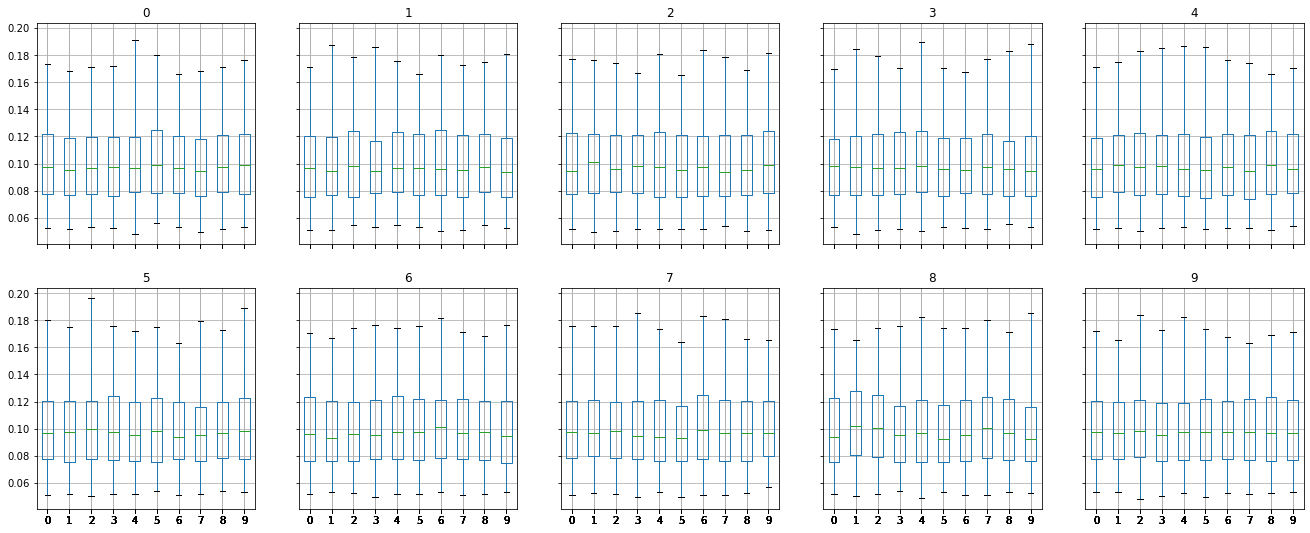

In [75]:

# df.boxplot()
plots = df.loc[:, df.columns != 'label'].groupby(df['label']).boxplot(layout=(2, 5), sharex=True, figsize=(22, 9), whis=(0, 100))
# df.groupby(['label']).loc[:, df.columns != 'label']#
# plots
f = plots[0].get_figure()
f.savefig('test.png')